In [2]:
import tensorflow as tf
import numpy as np
import pickle

In [7]:
with open ('C:\\Users\\Wilfred\\Desktop\\Min-Max\\input_layer_4_6_7_2.pickle','rb') as file:
    input_data = pickle.load(file)
print(input_data.shape)

x_train = input_data[:971320,:]
x_test = input_data[971320:, :]


(976320, 24)


In [8]:
with open ('C:\\Users\\Wilfred\\Desktop\\Min-Max\\output_layer_4_6_7_2.pickle','rb') as file:
    output_data = pickle.load(file)
output_data = np.transpose(output_data)
y_train = output_data[:971320,:]
y_test = output_data[971320:, :]
print(output_data.shape)

(976320, 12)


In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(150,input_shape = [24], activation = 'relu'),
    tf.keras.layers.Dense(150, activation = 'relu'),
    tf.keras.layers.Dense(150, activation = 'relu'),
    tf.keras.layers.Dense(12, activation = 'sigmoid')
])

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(x_train, y_train, batch_size = 1024, epochs = 20, verbose = 2,validation_data = (x_test, y_test))


Train on 971320 samples, validate on 5000 samples
Epoch 1/20
971320/971320 - 13s - loss: 0.2203 - accuracy: 0.9070 - val_loss: 0.2095 - val_accuracy: 0.9166
Epoch 2/20
971320/971320 - 13s - loss: 0.1626 - accuracy: 0.9236 - val_loss: 0.1757 - val_accuracy: 0.9255
Epoch 3/20
971320/971320 - 13s - loss: 0.1325 - accuracy: 0.9370 - val_loss: 0.1699 - val_accuracy: 0.9265
Epoch 4/20
971320/971320 - 13s - loss: 0.1121 - accuracy: 0.9471 - val_loss: 0.1570 - val_accuracy: 0.9327
Epoch 5/20
971320/971320 - 13s - loss: 0.0986 - accuracy: 0.9532 - val_loss: 0.1423 - val_accuracy: 0.9351
Epoch 6/20
971320/971320 - 13s - loss: 0.0894 - accuracy: 0.9569 - val_loss: 0.1349 - val_accuracy: 0.9407
Epoch 7/20
971320/971320 - 12s - loss: 0.0826 - accuracy: 0.9594 - val_loss: 0.1348 - val_accuracy: 0.9395
Epoch 8/20
971320/971320 - 10s - loss: 0.0774 - accuracy: 0.9613 - val_loss: 0.1380 - val_accuracy: 0.9412
Epoch 9/20
971320/971320 - 10s - loss: 0.0730 - accuracy: 0.9630 - val_loss: 0.1351 - val_accu

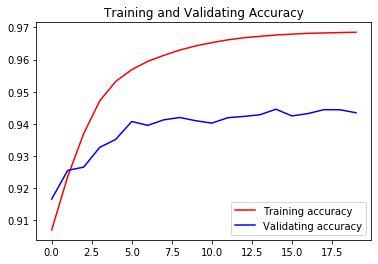

In [11]:
import matplotlib.pyplot as plt
plt.figure()
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validating accuracy')
plt.title('Training and Validating Accuracy')
plt.legend()

In [8]:
#model.evaluate(x_test, y_test, verbose = 2)

5000/1 - 0s - loss: 0.0630 - accuracy: 0.9720


[0.04715186712741852, 0.9720002]

In [12]:
model.save('C:\\Users\\Wilfred\\Desktop\\weights\\Min_Max\\Min_Max_4_6_7_2_model.h5')